<a href="https://colab.research.google.com/github/atinvento100/DIP-GroupProject/blob/master/Parking_Lot_Monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parking Lot Monitor...**

## Clone Mask-RCNN from git

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.24 MiB | 33.33 MiB/s, done.
Resolving deltas: 100% (559/559), done.


Installing Neccessay packages for mask-rcnn

In [ ]:
#!pip install imgaug
#!pip install Cython
!pip install pycocotools
#!pip install kaggle
!pip install mrcnn
#!pip install Pillow==5.3.0
#!pip install scikit-image
#!pip install tensorflow==1.14.0
!pip install tensorflow==1.9.0
!pip install keras==2.2.0
#!pip install pycocotools
print("Installed packages")



     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54932 sha256=38c98adebf42c72c6e40daa684311298d5fe85db28bb1ec1b3ef0d4fa9fb89e8
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn
     |████████████████████████████████| 51.1MB 83kB/s 
     |████████████████████████████████| 573kB 43.6MB/s 
     |████████████████████████████████| 3.3MB 45.6MB/s 
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: google-auth 1.17.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installat

     |████████████████████████████████| 307kB 2.6MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Installed packages


Importing all dependencies and checking if installed

In [ ]:
import numpy
import scipy
import PIL
import tensorflow
import skimage
import h5py
import IPython
import cv2
import keras
import scipy
import matplotlib
import cython

print("All dependencies are installed")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

All dependencies are installed


Using TensorFlow backend.


Changing the directory to Mask_RCNN

In [ ]:
import os
os.chdir('/content/Mask_RCNN/samples')

In [ ]:
#import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from mrcnn.config import Config

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

# Root directory of the project
ROOT_DIR = os.path.abspath("../")


import warnings
warnings.filterwarnings("ignore")

 #Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
 #Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco



%matplotlib inline

In [ ]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
  #class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [ ]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)
# Load weights trained on MS-COCO


In [ ]:
from keras.engine import saving
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Using Mask-RCNN on random images

Processing 1 images
image                    shape: (425, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


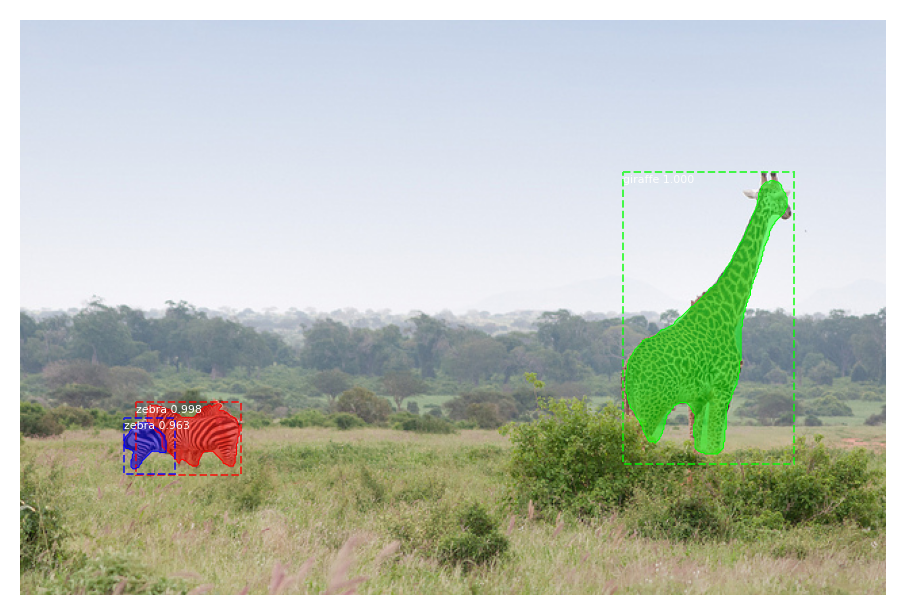

In [ ]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

## Parking Lot Monitor

The get_car boxes and ParkingMonitor FUNCTIONS

In [ ]:
import mrcnn.config
import mrcnn.utils

def get_car_boxes(boxes, class_ids):
    car_boxes = []

    for i, box in enumerate(boxes):
    
        if class_ids[i] in [3, 8, 6]:
            car_boxes.append(box)

    return np.array(car_boxes)


def ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames):
  results = model.detect([rgb_image], verbose=0)

      
  r = results[0]

  if parked_car_boxes is None:
    parked_car_boxes = get_car_boxes(r['rois'], r['class_ids'])
    
  else:
    car_boxes = get_car_boxes(r['rois'], r['class_ids'])
    overlaps = mrcnn.utils.compute_overlaps(parked_car_boxes, car_boxes)
    free_space = False

          
    for parking_area, overlap_areas in zip(parked_car_boxes, overlaps):

      max_IoU_overlap = np.max(overlap_areas)

             
      y1, x1, y2, x2 = parking_area

            
      if max_IoU_overlap < 0.15:
                 
        cv2.rectangle(rgb_image, (x1, y1), (x2, y2), (0, 255, 0), 3)
        free_space_frames +=1
                  
        free_space = True
      else:
                  
        cv2.rectangle(rgb_image, (x1, y1), (x2, y2), (255, 0, 0), 3)

        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(rgb_image, f"{max_IoU_overlap:0.2}", (x1 + 6, y2 - 6), font, 0.3, (255, 255, 255))

          
    if free_space:
      font = cv2.FONT_HERSHEY_DUPLEX
      cv2.putText(rgb_image, f"SPACE AVAILABLE!", (10, 50), font, 1.0, (0, 255, 0), 2, cv2.FILLED)
      cv2.putText(rgb_image, f"Free Lots: {free_space_frames}", (10, 100), font, 1.0, (255, 255, 0), 2, cv2.FILLED)
  plt.imshow(rgb_image)
  return parked_car_boxes

# plt.imshow(rgb_image)


In [ ]:
def IMG_NORM(img):
  norm_img = np.zeros((800,800))
  final_img = cv2.normalize(img,  norm_img, 0, 255, cv2.NORM_MINMAX)
  return final_img

**Testing on Image 1**

array([[166, 225, 261, 415],
       [177, 443, 265, 634],
       [169,  16, 261, 197]], dtype=int32)

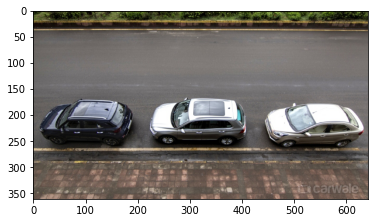

In [ ]:
#Step1: is to identify the parking spaces....

free_space_frames = 0
parked_car_boxes = None
file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread('https://imgd.aeplcdn.com//642x361//n/cw/ec/43710/hyundai-venue-exterior-11.jpeg?wm=1')
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)
parked_car_boxes # array which stores the quardinates of the identified parking spots....

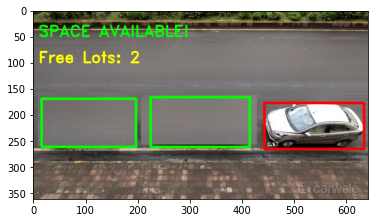

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'test.jpg'))
free_space_frames = 0
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)


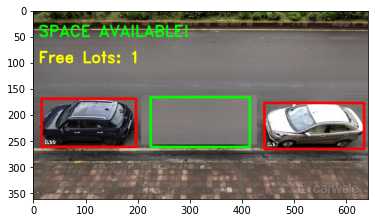

In [ ]:
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'test2.jpg'))
free_space_frames = 0
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)


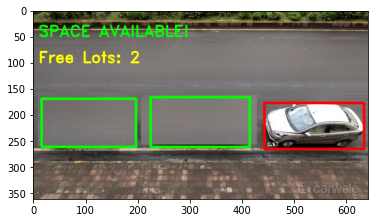

In [ ]:
rgb_image = IMG_NORM(rgb_image)
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'test.jpg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)

**Testing on Image 2**

array([[ 544,  946,  739, 1169],
       [ 569,  383,  743,  658],
       [ 563,    0,  727,  250],
       [ 567, 1504,  685, 1600],
       [ 570, 1156,  674, 1225],
       [ 560,  146,  729,  457],
       [ 553,  575,  672,  727],
       [ 581, 1459,  624, 1520],
       [ 549,  646,  738,  897],
       [ 540, 1200,  755, 1525],
       [ 568,    2,  618,   69],
       [ 542,    0,  606,  230],
       [ 578,  874,  645,  956]], dtype=int32)

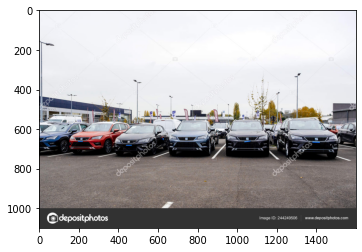

In [ ]:
# Step 1: is to identify the parking spaces....
free_space_frames = 0
parked_car_boxes = None
file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread('https://st4.depositphotos.com/1083585/24424/i/1600/depositphotos_244249506-stock-photo-car-dealer-new-cars-in.jpg')
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)
parked_car_boxes # array which stores the quardinates of the identified parking spots....

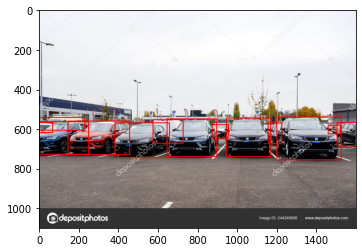

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread('https://st4.depositphotos.com/1083585/24424/i/1600/depositphotos_244249506-stock-photo-car-dealer-new-cars-in.jpg')
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)


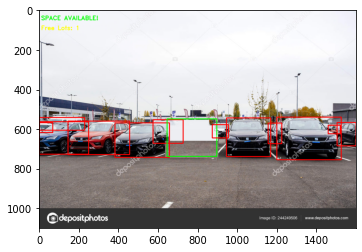

In [ ]:
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'test3.jpg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)

**Testing on Image 3**

array([[ 285,  882,  459, 1283],
       [ 263,  227,  521,  739],
       [ 290, 1092,  397, 1300],
       [ 278,  612,  488, 1072],
       [ 264,    0,  542,  258]], dtype=int32)

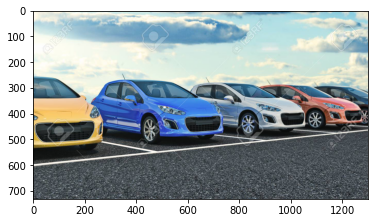

In [ ]:
# Step 1: is to identify the parking spaces....

free_space_frames = 0
parked_car_boxes = None
file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread('https://previews.123rf.com/images/lchumpitaz/lchumpitaz1704/lchumpitaz170400107/75480804-cars-in-parking-lot-3d-rendering.jpg')
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)
parked_car_boxes # array which stores the quardinates of the identified parking spots....

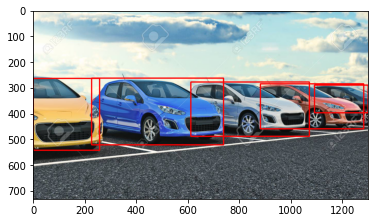

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread('https://previews.123rf.com/images/lchumpitaz/lchumpitaz1704/lchumpitaz170400107/75480804-cars-in-parking-lot-3d-rendering.jpg')
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)

**Testing on JBN car park Image**

array([[351,   3, 687, 453],
       [378, 338, 591, 639],
       [378, 863, 445, 949],
       [365, 648, 486, 866],
       [374, 960, 413, 987]], dtype=int32)

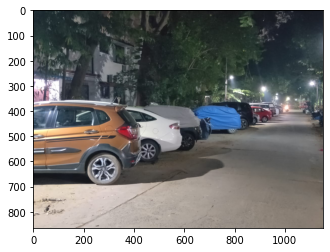

In [ ]:
# Step 1: is to identify the parking spaces....

free_space_frames = 0
parked_car_boxes = None
file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'JBN_carpark.jpeg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)
parked_car_boxes # array which stores the quardinates of the identified parking spots....

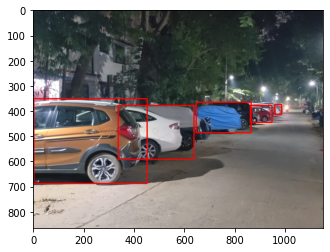

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'JBN_carpark.jpeg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)


**Testing on another JBN car park image**

array([[ 311,  143,  501,  445],
       [ 351,  413,  584,  716],
       [ 349,   62,  484,  174],
       [ 344,  312,  516,  516],
       [ 350,   17,  439,  126],
       [ 231,  687,  643, 1102]], dtype=int32)

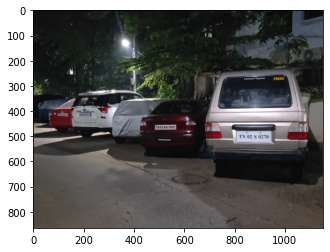

In [ ]:
# Step 1: is to identify the parking spaces....

free_space_frames = 0
parked_car_boxes = None
file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'JBN_carpark1.jpeg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)
parked_car_boxes # array which stores the quardinates of the identified parking spots....

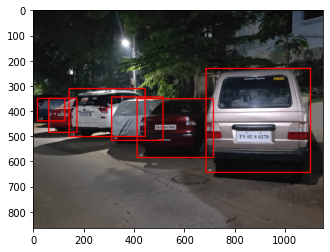

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'JBN_carpark1.jpeg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)


Testing on car park in Temple

array([[ 412, 1072,  542, 1150],
       [ 376,  542,  529,  713],
       [ 372,  753,  539,  975],
       [ 391,   94,  530,  336],
       [ 377,  329,  531,  501]], dtype=int32)

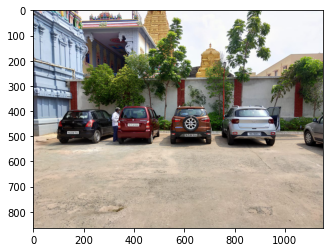

In [ ]:
# Step 1: is to identify the parking spaces....

free_space_frames = 0
parked_car_boxes = None
file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'temp_car1.jpeg'))
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames)
parked_car_boxes # array which stores the quardinates of the identified parking spots....

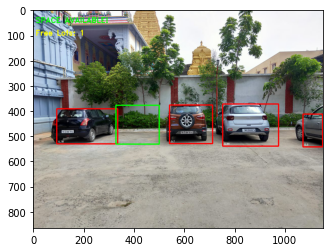

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'temp_car2.jpeg'))
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)


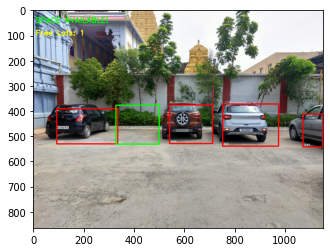

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'temp_car3.jpeg'))
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)


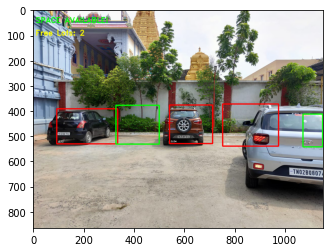

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'temp_car4.jpeg'))
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)


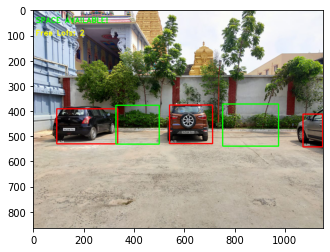

In [ ]:
#Step 2: to check if Parking spaces identified are occupied or empty.....

file_names = next(os.walk(IMAGE_DIR))[2]
rgb_image = skimage.io.imread(os.path.join(IMAGE_DIR, 'temp_car5.jpeg'))
rgb_image = IMG_NORM(rgb_image)
parked_car_boxes = ParkingMonitor(rgb_image,parked_car_boxes,free_space_frames=0)
